# Breast Cancer Prediction

# Step 1: Import all the required libraries
* __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
* __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
* __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
* __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Loading libraries 

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings('ignore')

## Step 2 : Read dataset and basic details of dataset
#### Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In [2]:
#loading training data
try:
    df = pd.read_csv("C:\data.csv")
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [3]:
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 569 rows and 33 columns


# We noticed that we don't have any target variable in the dataset but as problem statement is defined we have to Build a model to predict how many days it takes for a car to be built (from assembly_start_date to final_completion_date).
df.info()

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df = df.drop(['id','Unnamed: 32'],axis=1)


In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df['diagnosis'] = df['diagnosis'].map({'M':0,'B':1})

In [10]:
df['diagnosis'].unique()

array([0, 1], dtype=int64)

In [11]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [12]:
cols = df.columns.tolist()
cols

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [13]:
# Step 3 - Descriptive Analysis
df.mean()

diagnosis                    0.627417
radius_mean                 14.127292
texture_mean                19.289649
perimeter_mean              91.969033
area_mean                  654.889104
smoothness_mean              0.096360
compactness_mean             0.104341
concavity_mean               0.088799
concave points_mean          0.048919
symmetry_mean                0.181162
fractal_dimension_mean       0.062798
radius_se                    0.405172
texture_se                   1.216853
perimeter_se                 2.866059
area_se                     40.337079
smoothness_se                0.007041
compactness_se               0.025478
concavity_se                 0.031894
concave points_se            0.011796
symmetry_se                  0.020542
fractal_dimension_se         0.003795
radius_worst                16.269190
texture_worst               25.677223
perimeter_worst            107.261213
area_worst                 880.583128
smoothness_worst             0.132369
compactness_

In [14]:
for i in cols:
    print(df[i].value_counts())
    

1    357
0    212
Name: diagnosis, dtype: int64
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius_mean, Length: 456, dtype: int64
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: texture_mean, Length: 479, dtype: int64
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: perimeter_mean, Length: 522, dtype: int64
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: area_mean, Length: 539, dtype: int64
0.10070    5
0.11500    4
0.10540    4
0.10750    4
0.10630    3
          ..
0.08876    1
0.09965    1
0.13230    1
0.08968    1
0.05263    1
Name: smoothness_mean, Length: 474, dtype: int64
0.11470    3
0.12060    3
0.07698    2
0.05743    2
0.03834    2
       

In [15]:
df.median()

diagnosis                    1.000000
radius_mean                 13.370000
texture_mean                18.840000
perimeter_mean              86.240000
area_mean                  551.100000
smoothness_mean              0.095870
compactness_mean             0.092630
concavity_mean               0.061540
concave points_mean          0.033500
symmetry_mean                0.179200
fractal_dimension_mean       0.061540
radius_se                    0.324200
texture_se                   1.108000
perimeter_se                 2.287000
area_se                     24.530000
smoothness_se                0.006380
compactness_se               0.020450
concavity_se                 0.025890
concave points_se            0.010930
symmetry_se                  0.018730
fractal_dimension_se         0.003187
radius_worst                14.970000
texture_worst               25.410000
perimeter_worst             97.660000
area_worst                 686.500000
smoothness_worst             0.131300
compactness_

In [16]:
df.mode()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1601,...,12.36,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427
1,NaN,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,0.1714,...,NaN,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN
2,NaN,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,0.1717,...,NaN,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN
3,NaN,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,0.1769,...,NaN,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN
4,NaN,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,0.1893,...,NaN,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN
5,NaN,NaN,18.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,489.5,0.1312,NaN,NaN,NaN,0.3196,NaN
6,NaN,NaN,18.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,546.7,0.1347,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,19.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,547.4,0.1401,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,20.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,624.1,0.1415,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,698.8,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.std()

diagnosis                    0.483918
radius_mean                  3.524049
texture_mean                 4.301036
perimeter_mean              24.298981
area_mean                  351.914129
smoothness_mean              0.014064
compactness_mean             0.052813
concavity_mean               0.079720
concave points_mean          0.038803
symmetry_mean                0.027414
fractal_dimension_mean       0.007060
radius_se                    0.277313
texture_se                   0.551648
perimeter_se                 2.021855
area_se                     45.491006
smoothness_se                0.003003
compactness_se               0.017908
concavity_se                 0.030186
concave points_se            0.006170
symmetry_se                  0.008266
fractal_dimension_se         0.002646
radius_worst                 4.833242
texture_worst                6.146258
perimeter_worst             33.602542
area_worst                 569.356993
smoothness_worst             0.022832
compactness_

In [18]:
df.var()

diagnosis                       0.234177
radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst      

In [19]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [20]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

df.min()

df.max()

In [21]:
### Correlation
#Correlation is an indication about the changes between two variables. In our previous chapters, we have discussed Pearson's Correlation coefficients and the importance of Correlation too.

In [22]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,-0.596534,-0.696360,-0.776614,-0.330499,...,-0.776454,-0.456903,-0.782914,-0.733825,-0.421465,-0.590998,-0.659610,-0.793566,-0.416294,-0.323872
radius_mean,-0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,-0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,-0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,-0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,-0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,-0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,-0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


# Skewness
Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

In [23]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [24]:
int64_cols = ['float64']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [25]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,radius_mean,0.9424,positive (+ve) skewed
1,texture_mean,0.6504,positive (+ve) skewed
2,perimeter_mean,0.9907,positive (+ve) skewed
3,area_mean,1.6457,positive (+ve) skewed
4,smoothness_mean,0.4563,positive (+ve) skewed
5,compactness_mean,1.1901,positive (+ve) skewed
6,concavity_mean,1.4012,positive (+ve) skewed
7,concave points_mean,1.1712,positive (+ve) skewed
8,symmetry_mean,0.7256,positive (+ve) skewed
9,fractal_dimension_mean,1.3045,positive (+ve) skewed


# Step 3 Insights:-
With the statistical analysis we have found that the data have a lot of skewness in them mostly are +vely skewed while most of the columns have zero varience

Step 4: Data Exploration

# Data Visulaization

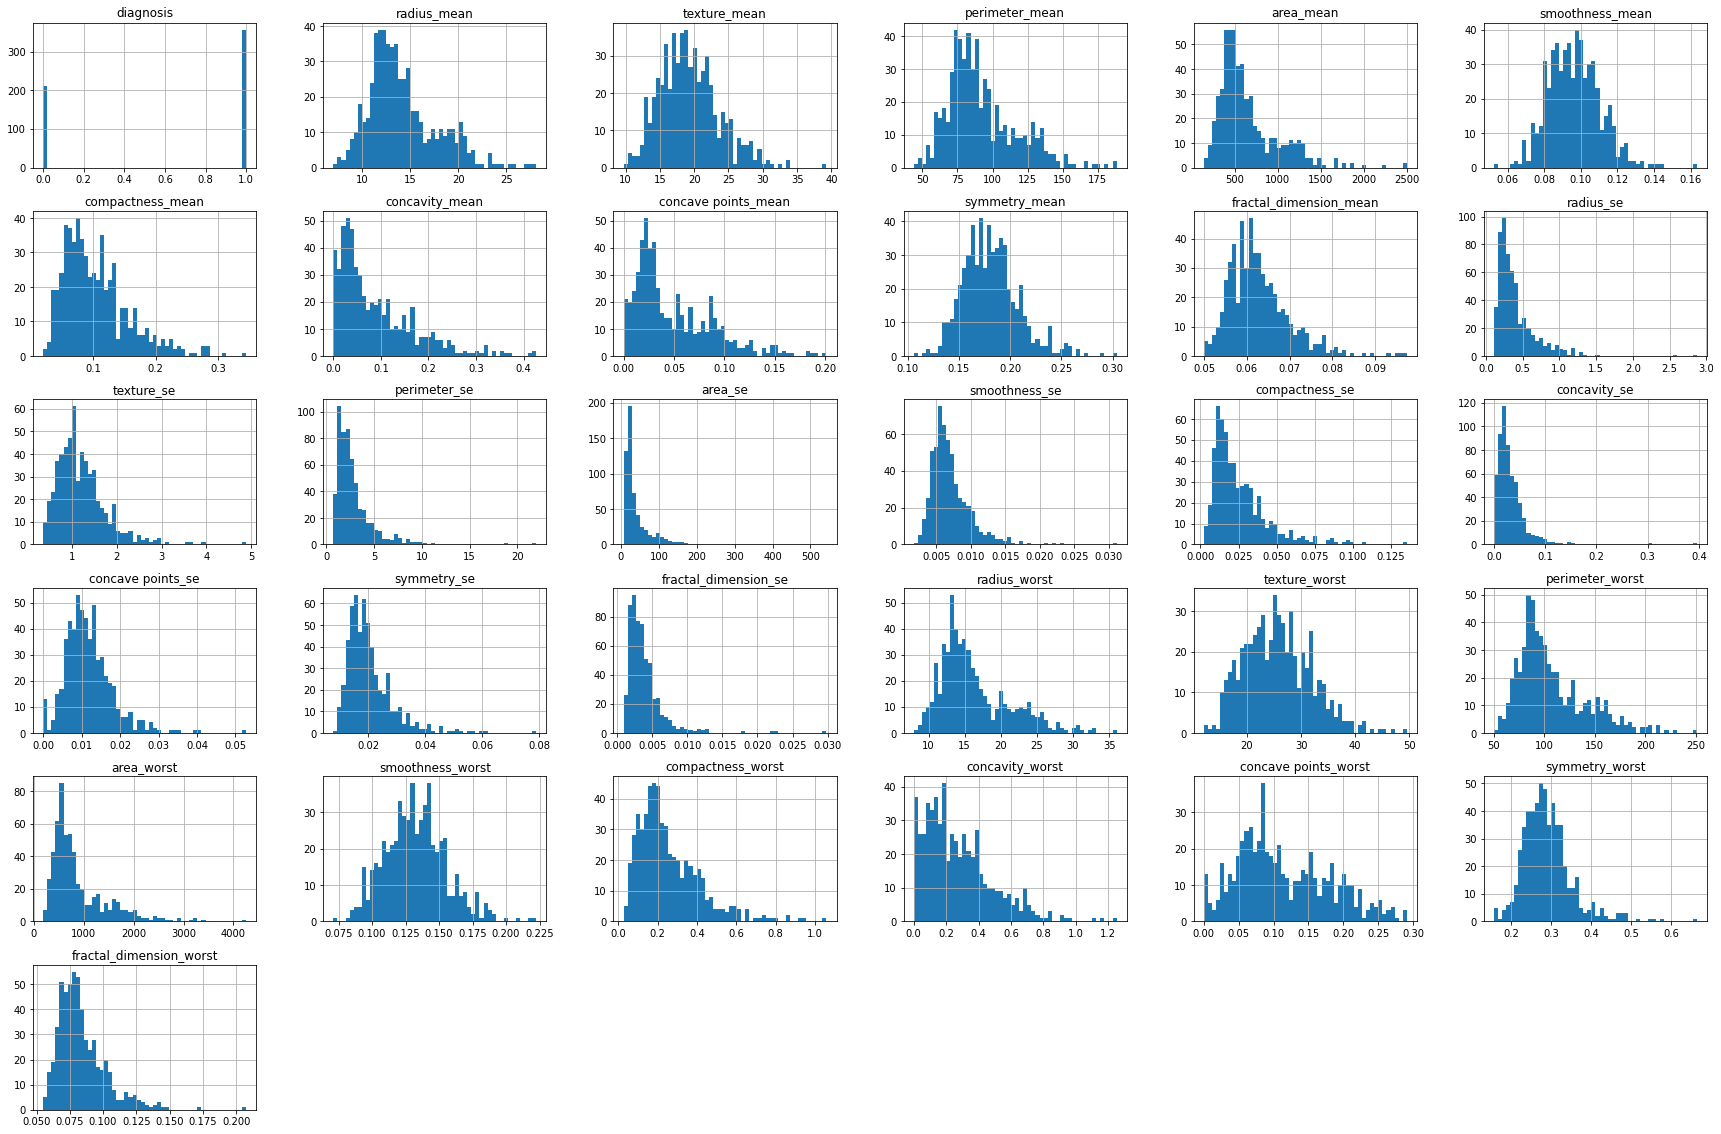

In [26]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,20))
plt.show()

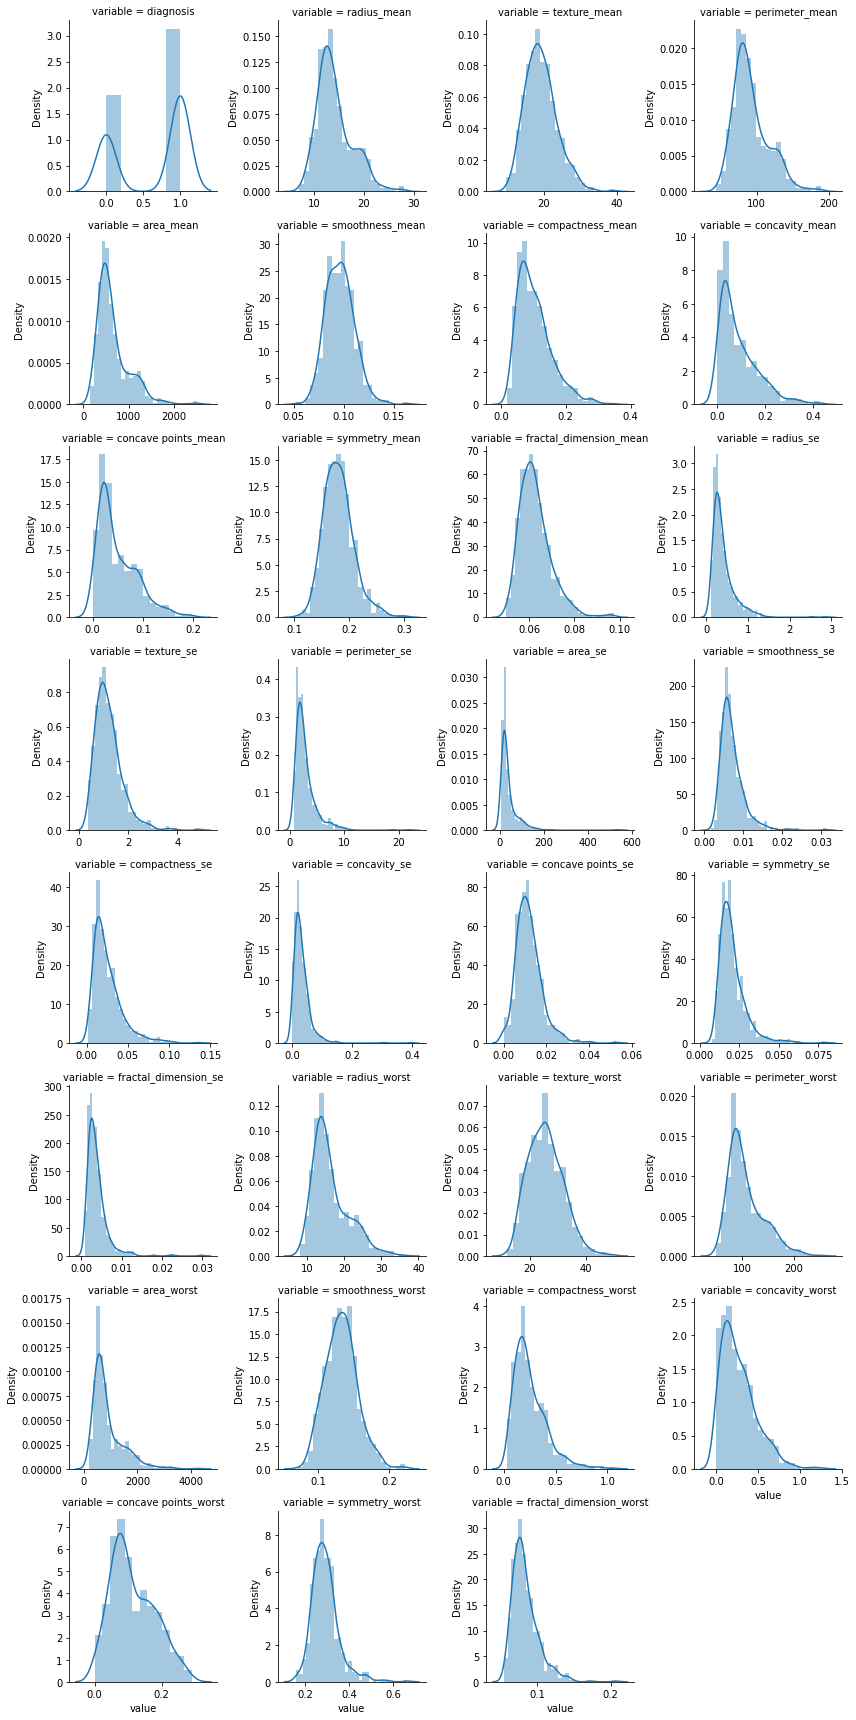

In [27]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

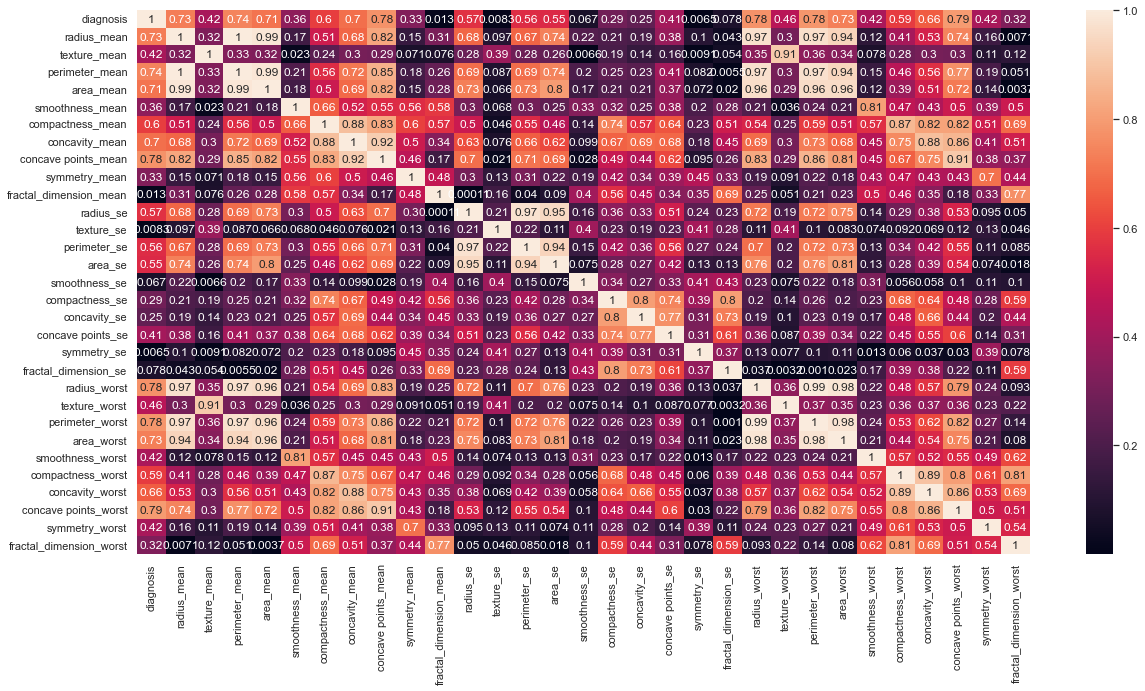

In [28]:
#correlation plot
corr = df.corr().abs()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(corr,annot=True)
plt.show()

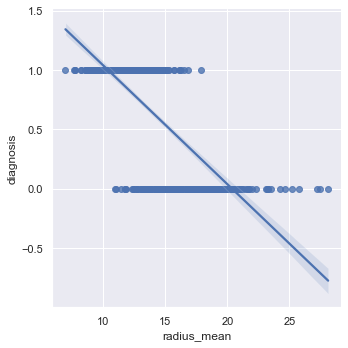

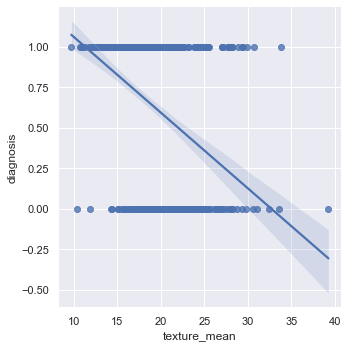

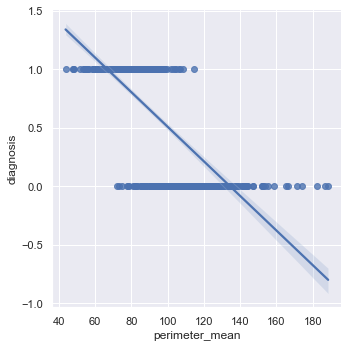

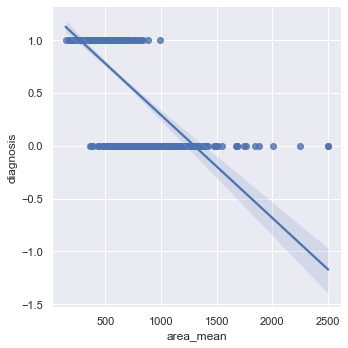

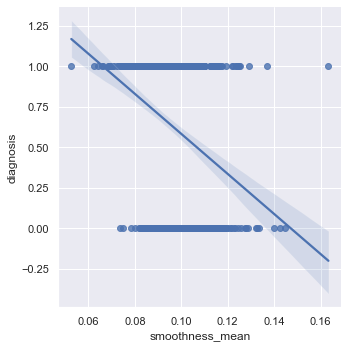

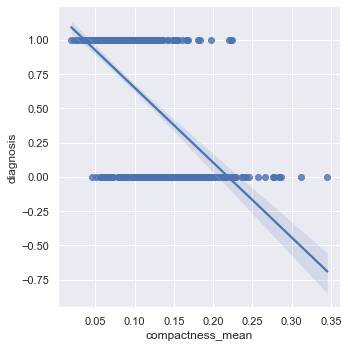

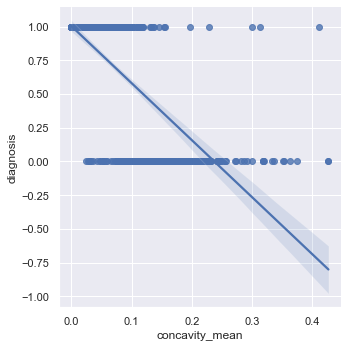

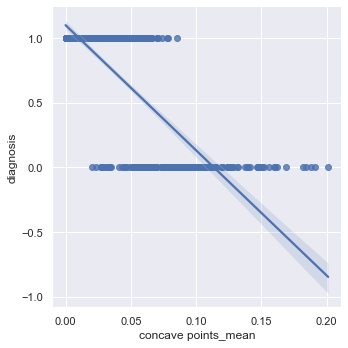

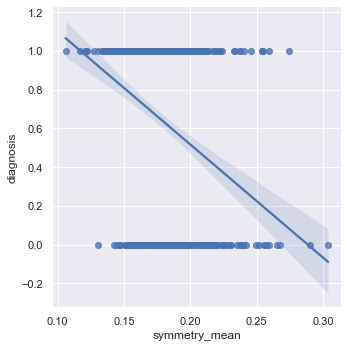

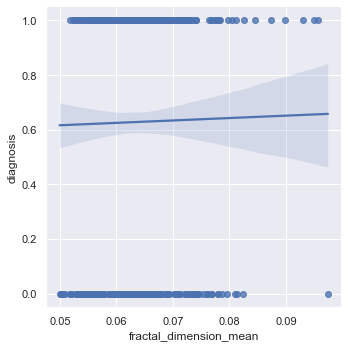

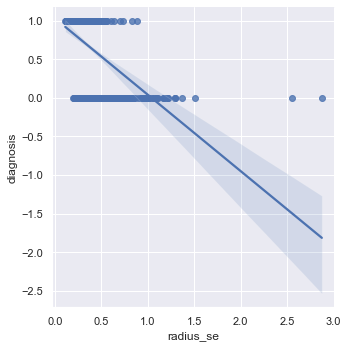

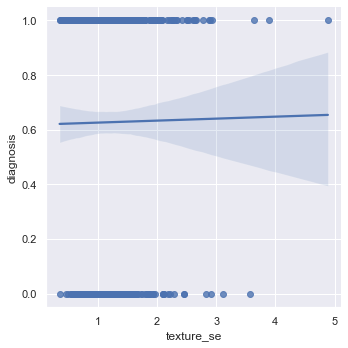

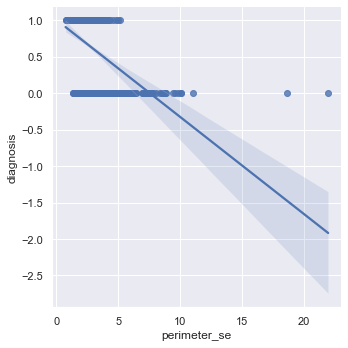

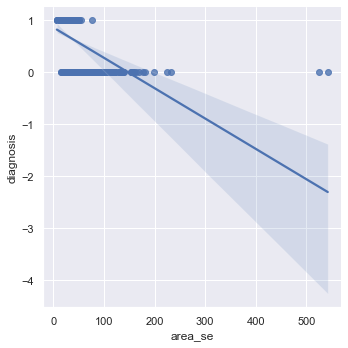

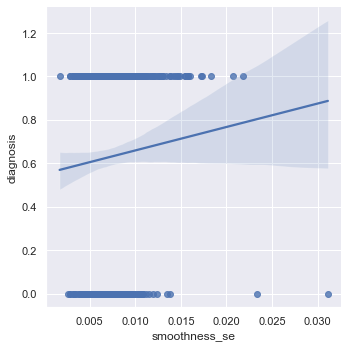

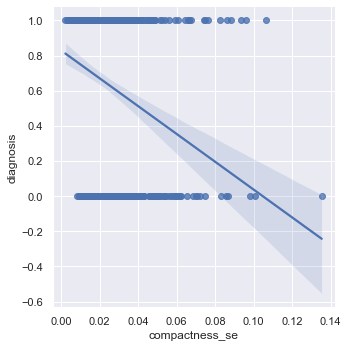

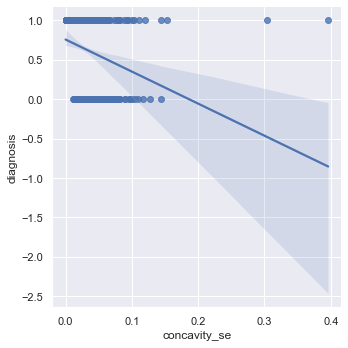

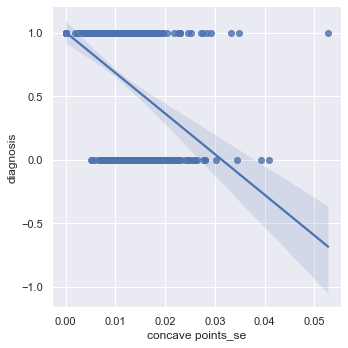

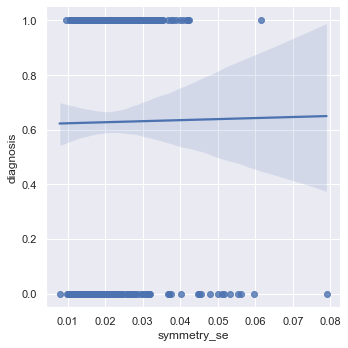

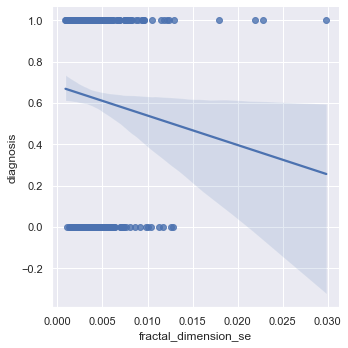

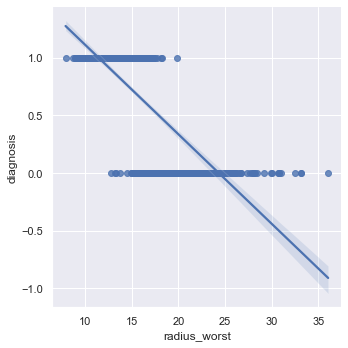

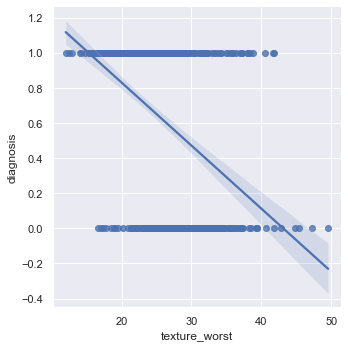

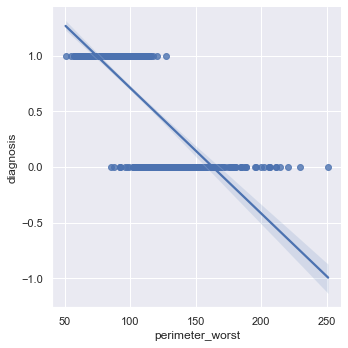

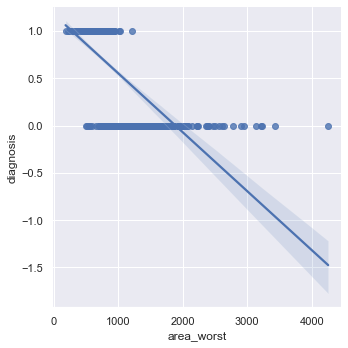

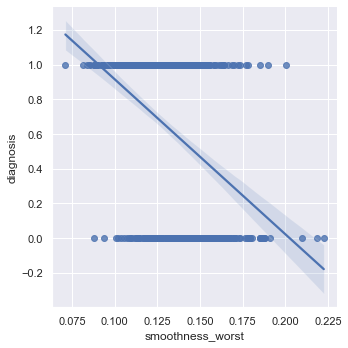

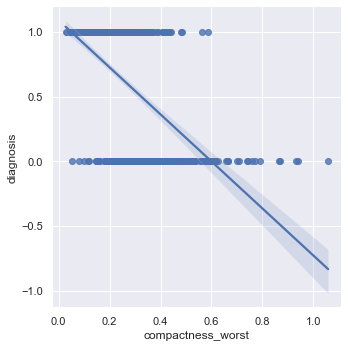

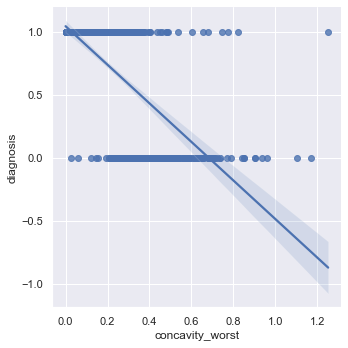

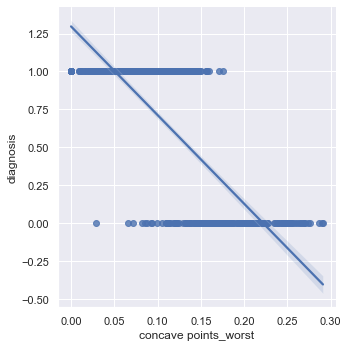

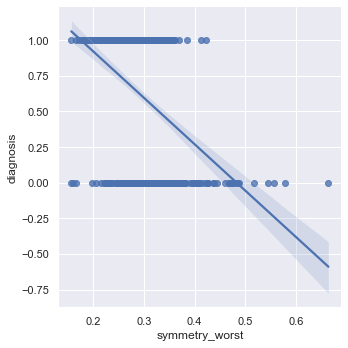

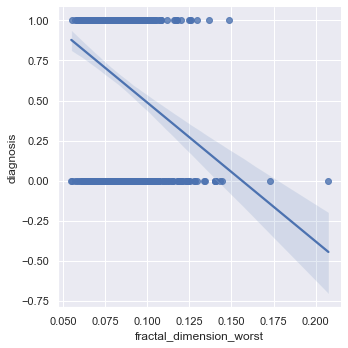

In [30]:
sns.set(rc = {'figure.figsize':(18,10)})
for value in int64_lst_col:
    sns.lmplot(x=value, y="diagnosis", data=df);

plt.show()

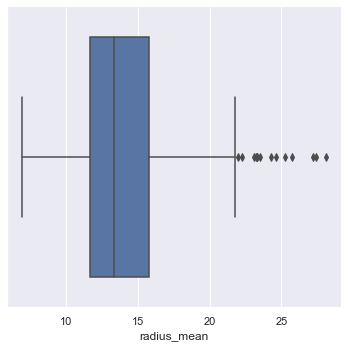

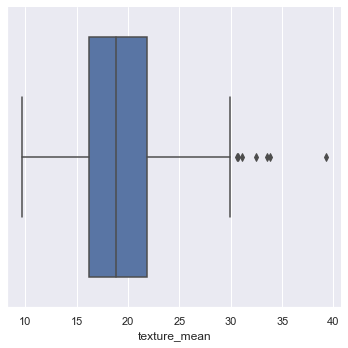

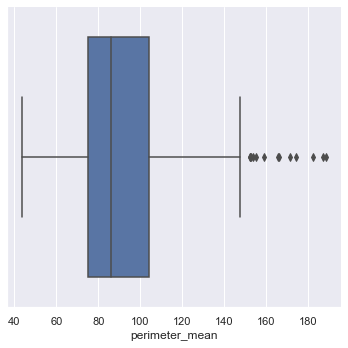

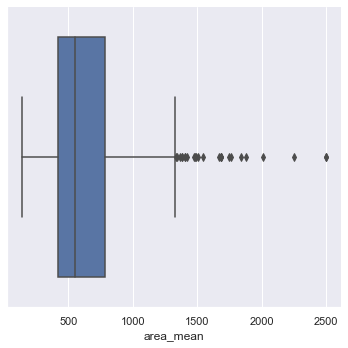

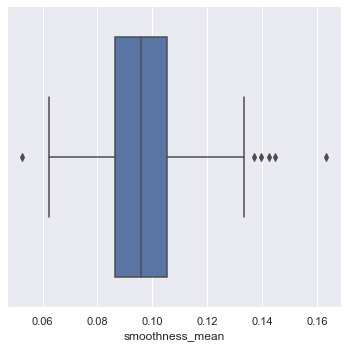

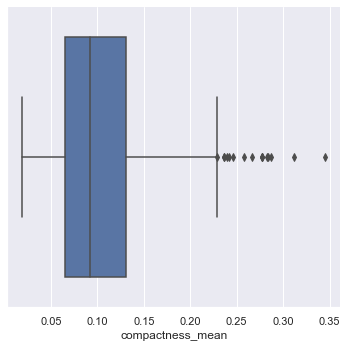

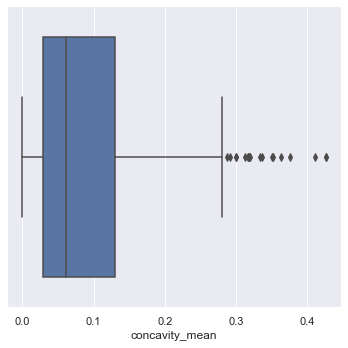

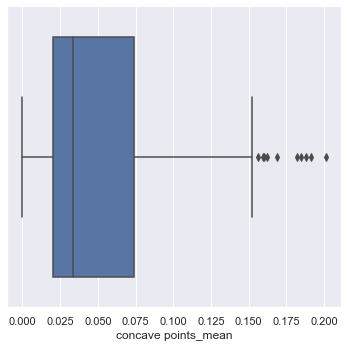

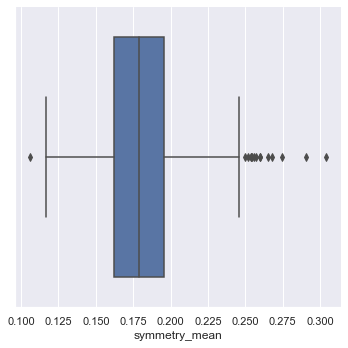

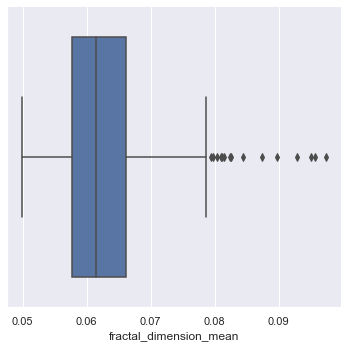

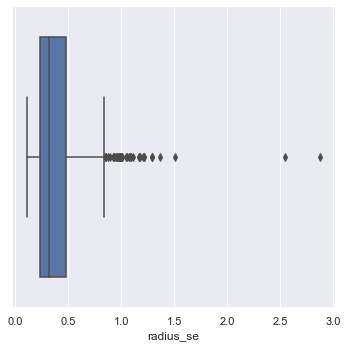

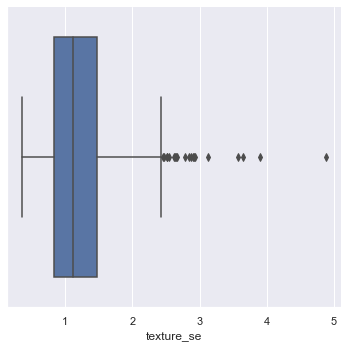

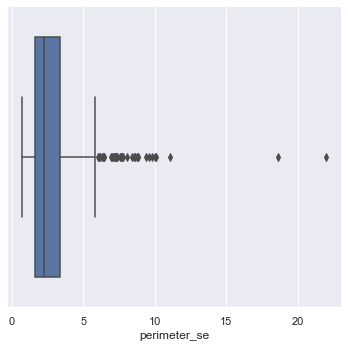

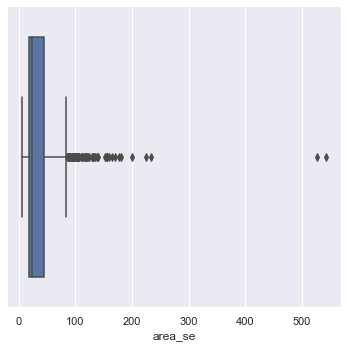

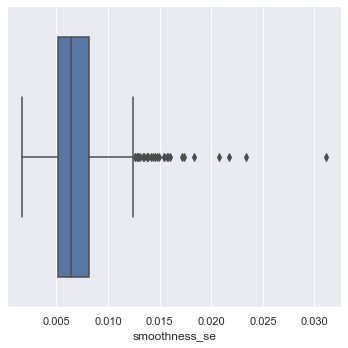

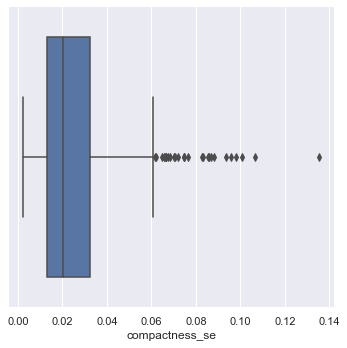

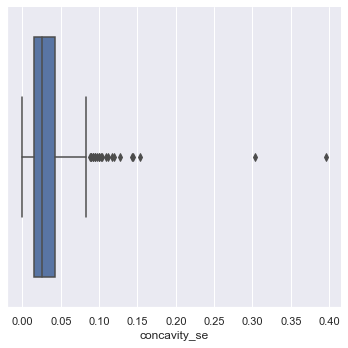

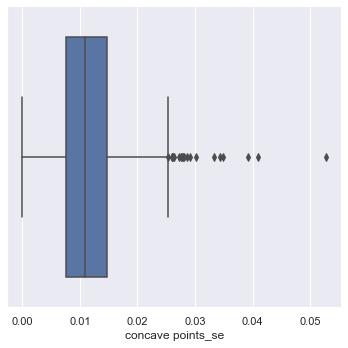

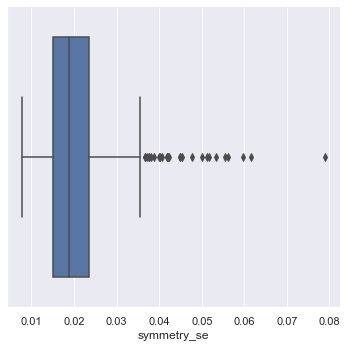

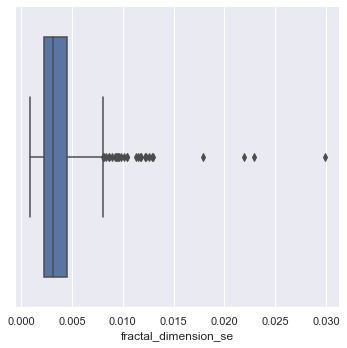

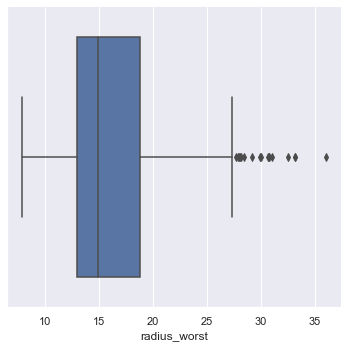

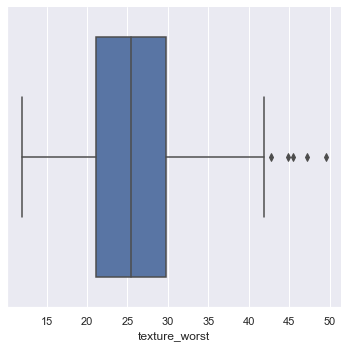

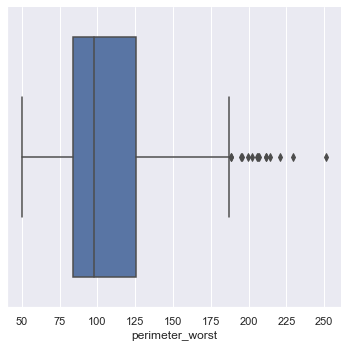

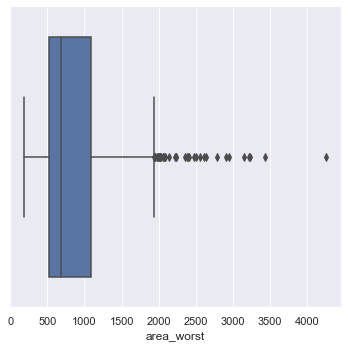

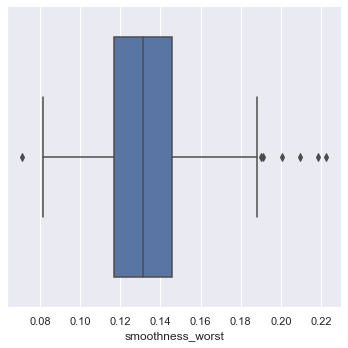

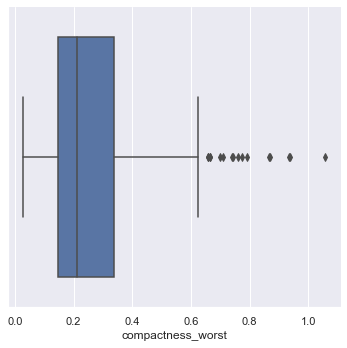

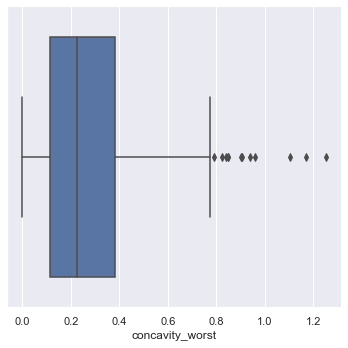

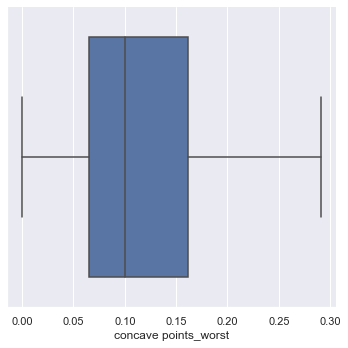

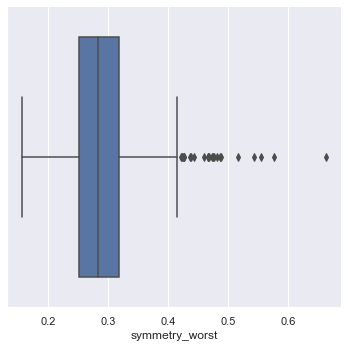

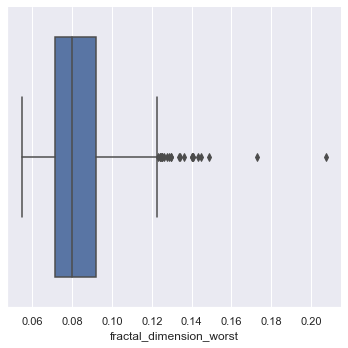

In [31]:
#out
for value in int64_lst_col:
    sns.catplot(data=df, x=value, kind="box")
    
plt.show()

In [39]:
## Observation:
#### As we can see that there are many outliers present in the data which is not acurrate for us. So we will use decision and random forest to deal with outliers.

In [33]:
# In this section we will plot various graphs and with the help of those graph we will analyse the data more effectively and properly.


In [34]:
### Histogram 

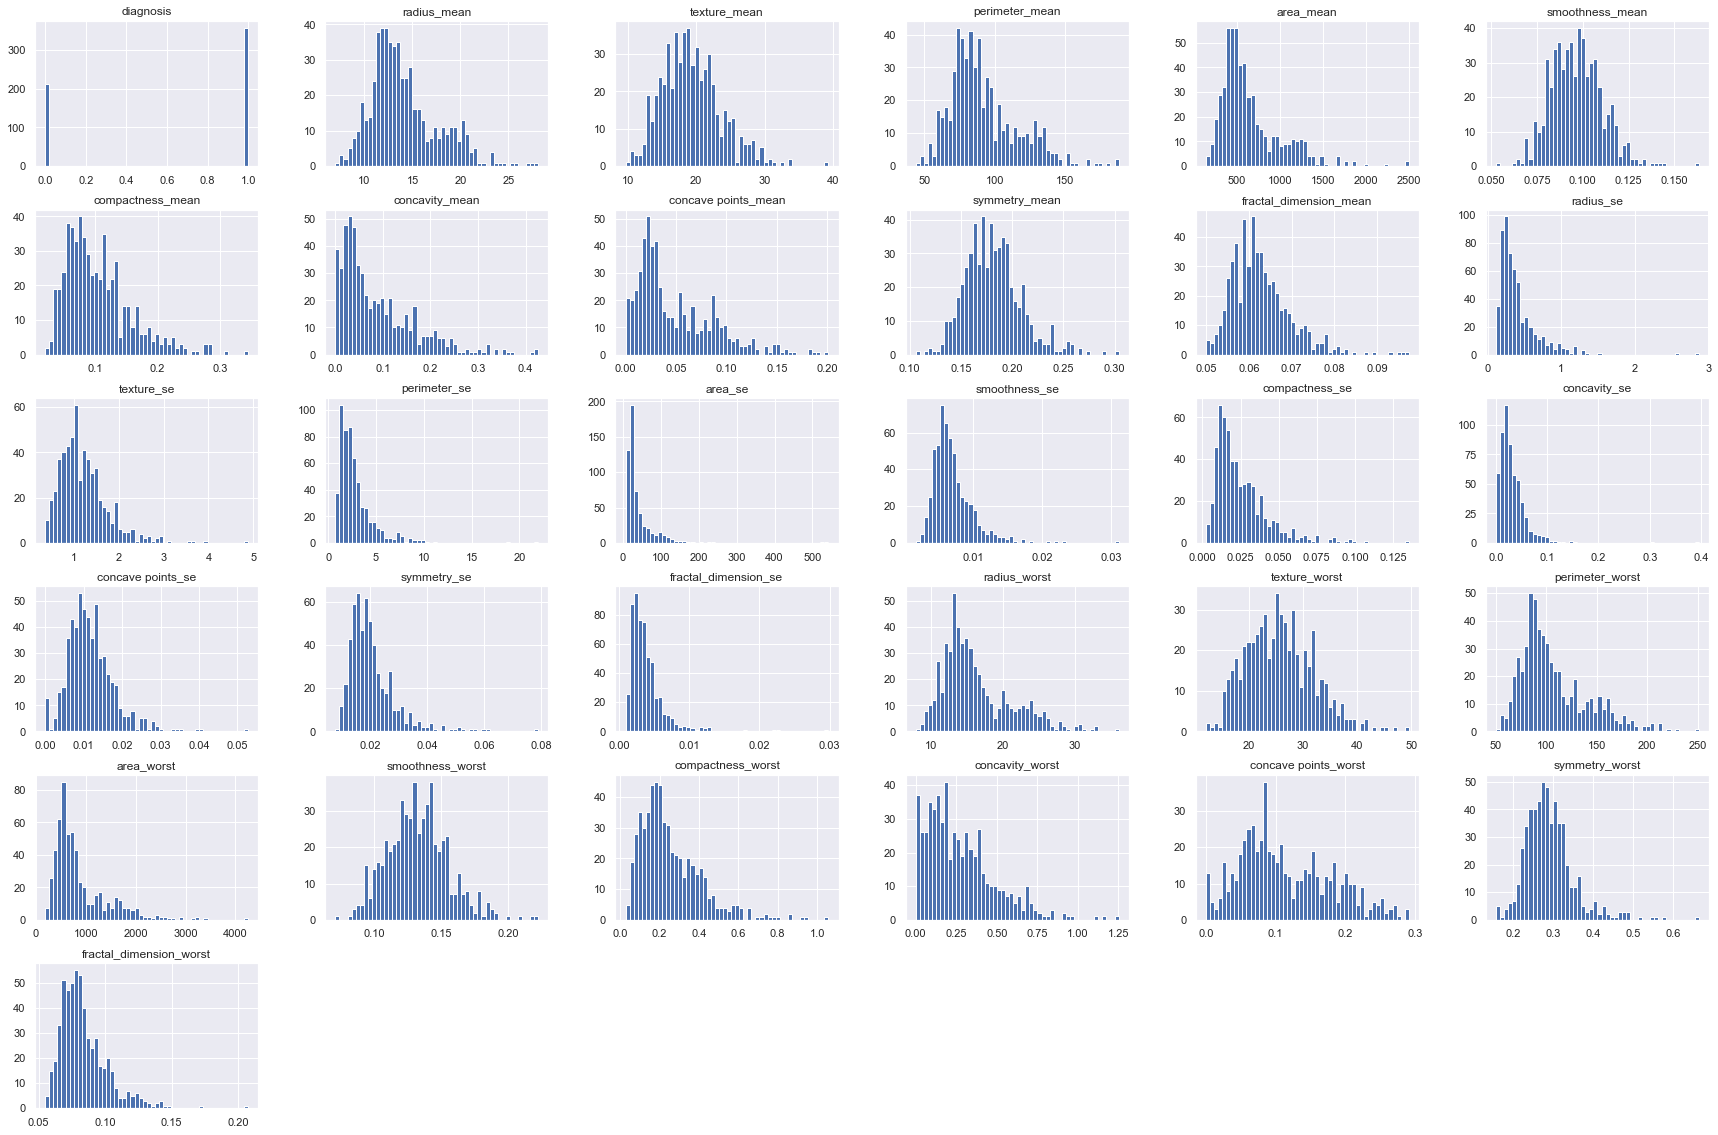

In [35]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,20))
plt.show()

In [36]:
### Distplot 

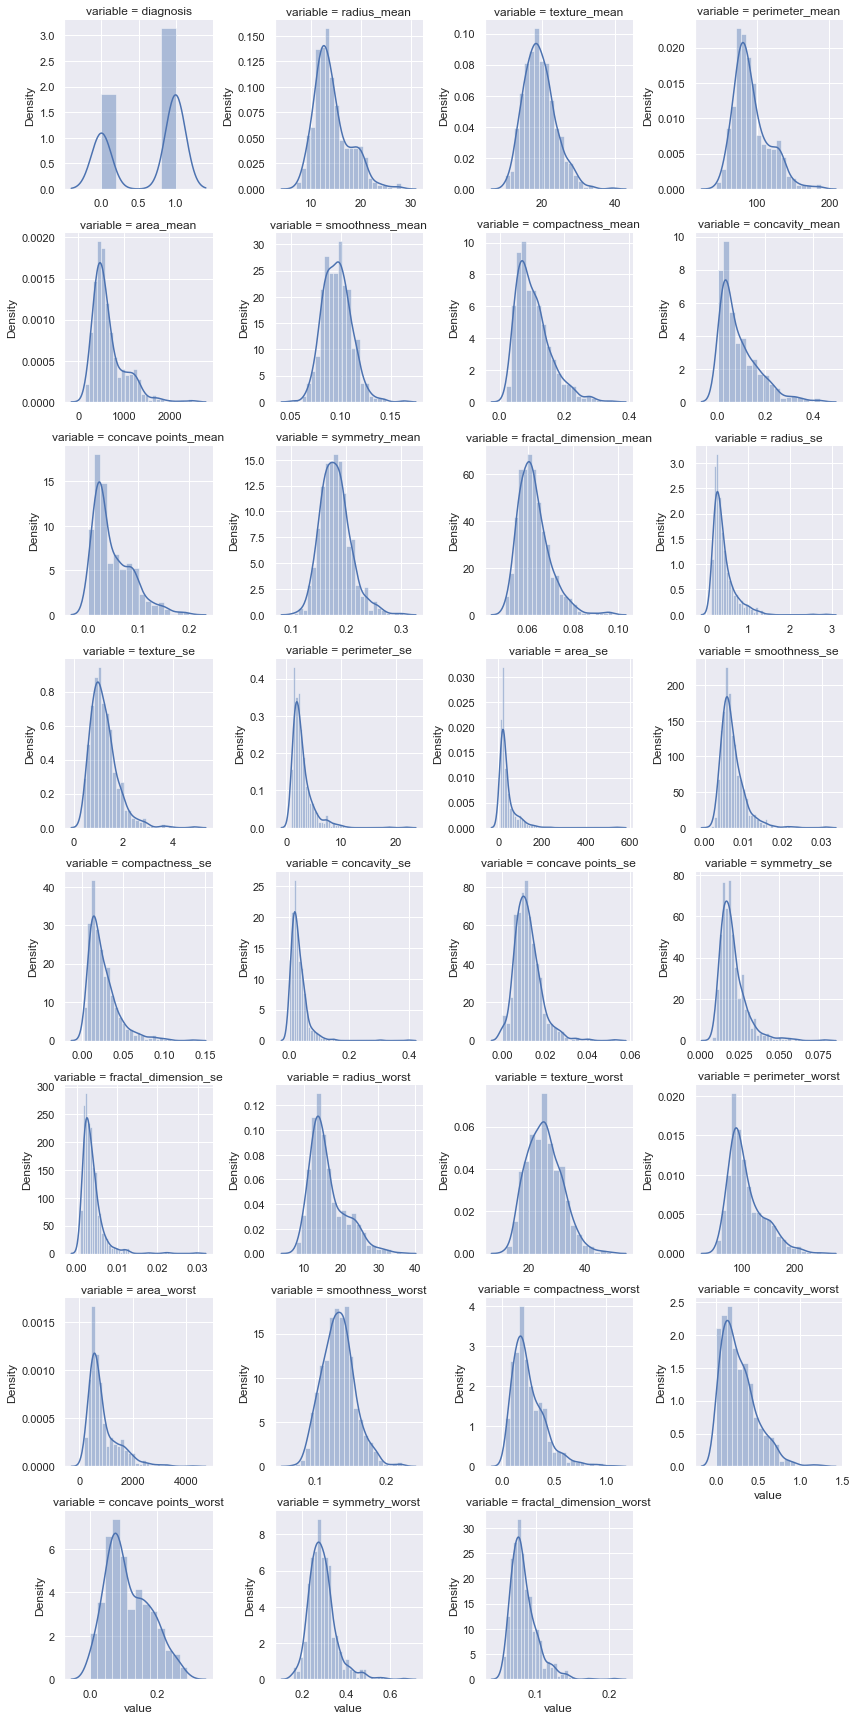

In [37]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [ ]:
### Observation:
#### With the distplot we get the graphical view of the skewness of the data. 

In [ ]:
## Heatmap 

In [ ]:
### Correlation within feature variables

#### Correlation - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

#### Correlation can have a value:
#### 1) 1 is a perfect positive correlation.
#### 2) 0 is no correlation (the values don't seem linked at all).
#### 3) -1 is a perfect negative correlation. 

In [ ]:
## Observation:
#### As we can see that there are no outliers present in the data which is very good for us. As we can proceed without any complex processing over data. And we also dont need to do scaling.

In [ ]:
### Before moving we will divide our target and feature variable.


In [43]:
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis']


In [44]:
X.shape, y.shape

((569, 30), (569,))

In [42]:
#Reshaping of y is required
y = y.values.reshape(-1,1)

In [ ]:
### Split dataset into train and test dataset 

In [45]:
#Here we are spliting our dataset into 70/30 percentage where 70% dataset goes into the training and 30% goes into testing the part. 

In [46]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 70-30% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [48]:
# Model Training 

In [49]:
# In this step we are going to train our dataset on different Machine Learning algorithms. As we know that our target variable is not in continous format so we have to apply classification algorithms.

### Algorithms we are going to use in this step are:
#### 1)Decision Tree
#### 2)Random Forest

## Decision Tree 

In [50]:
#Importing Libraries
from sklearn import tree

In [52]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

In [53]:
y_predicted = dtree.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predicted)*100
print("Accuracy of Decision Tree is: -",acc)

Accuracy of Decision Tree is: - 94.15204678362574


## Random Forest 

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
ran_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [57]:
ran_clf.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=2, random_state=0)

In [58]:
y_predicted = ran_clf.predict(X_test)

In [59]:
acc = accuracy_score(y_test, y_predicted)*100
print("Accuracy of Random Forest is: -",acc)

Accuracy of Random Forest is: - 95.90643274853801


# Observation

In [60]:
# Pickle Model Creation

In [64]:
import pickle
pickle.dump(dtree, open('breast_cancer_detection_Decision.pkl', 'wb'))
pickle.dump(ran_clf, open('breast_cancer_detection_Random.pkl', 'wb'))

In [65]:
import pickle

def model_prediction(features, model):
    
    pickled_model = pickle.load(open(model, 'rb'))
    breast_cancer_detect = str((list(pickled_model.predict(features))))
    
    return str(breast_cancer_detect)

In [66]:

print(model_prediction(X_test.iloc[0:1,:],'breast_cancer_detection_Decision.pkl'))
print(model_prediction(X_test.iloc[0:1,:],'breast_cancer_detection_Random.pkl'))

[1]
[1]


# In this step we save our model in pickel file format so we can use it now anywhere for prediction purpose 